In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/resume-dataset/Resume/Resume.csv")

In [3]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [4]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [5]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

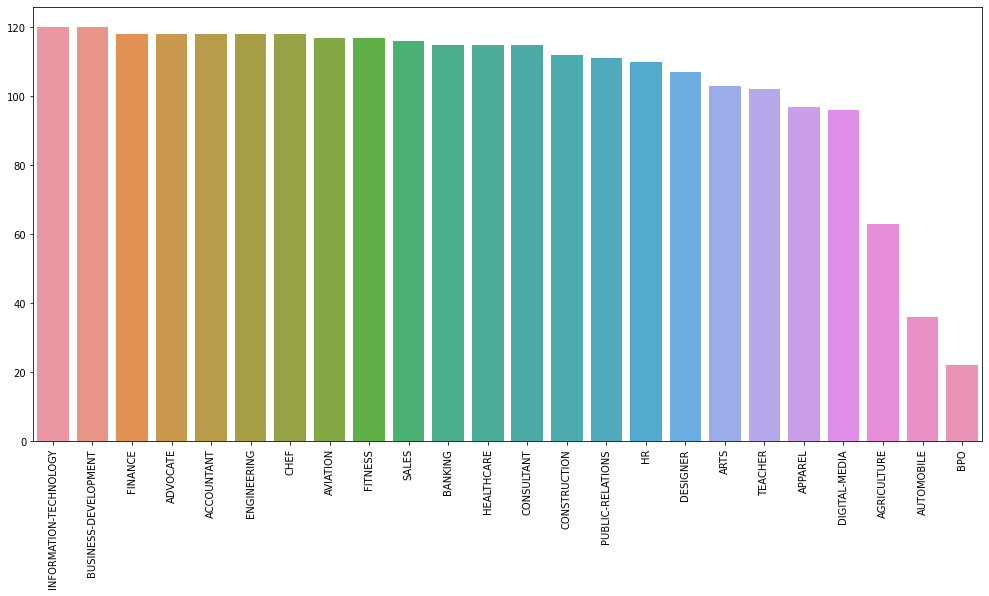

In [6]:
fig = plt.figure(figsize=(17,8))
sns.barplot(x=df['Category'].value_counts().index,
           y=df['Category'].value_counts().values)
plt.tick_params(axis ='x',rotation = 90)

In [7]:
#now label encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
l = LabelEncoder()
Categoryencoder  = l.fit_transform(df['Category'])

In [10]:
Categoryencoder.shape

(2484,)

In [11]:
#now remove special charactors

In [12]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  
    resumeText = re.sub('RT|cc', ' ', resumeText)  
    resumeText = re.sub('#\S+', '', resumeText)  
    resumeText = re.sub('@\S+', '  ', resumeText)  
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText) 
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  
    return resumeText

In [13]:
df['cleanResume'] = df.Resume_str.apply(lambda x:cleanResume(x))

In [14]:
df.head()

,ID,Resume_str,Resume_html,Category,cleanResume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST US HR OPERATIONS Summary Versat...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR DIRECTOR Summary Over 20 years experience ...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST Summary Dedicated Driven and Dy...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [15]:
# now convert the vector


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
word = TfidfVectorizer()

In [18]:
clearnResume = word.fit_transform(df['cleanResume'])

In [19]:
#now train model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(clearnResume,Categoryencoder,test_size = 0.20)

In [22]:
xtrain.shape

(1987, 40284)

In [23]:
ytrain.shape

(1987,)

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(xtrain,ytrain)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
model.score(xtrain,ytrain)

0.6406643180674384

In [27]:
model.score(xtest,ytest)

0.4969818913480885

In [28]:
model.predict(xtest)

array([18, 20, 16, 21, 19,  7,  4, 22, 19, 16, 23, 20, 20, 18, 20, 22, 21,
       14, 22,  0, 18, 23, 22,  0,  0, 13, 13, 16, 23, 19, 10, 21, 15, 13,
       19, 23, 12, 21, 14, 22, 18, 13, 13, 21, 19,  0, 19,  0, 21, 14, 19,
       22, 15,  9,  0, 16,  6, 20, 18, 21, 22,  7, 15, 21,  9, 13, 23, 23,
       21,  3, 21,  1, 19, 18, 15, 18, 22, 11, 20, 19, 22, 16,  9,  3,  3,
       23, 20,  0,  1, 21, 16, 19, 14, 22, 18, 19, 11,  9,  1, 10,  4, 11,
       10,  4, 22, 19, 23,  6, 13,  4,  9, 20, 20, 19, 19,  3, 18, 21,  9,
       17, 20, 16,  9, 20, 17, 12, 22, 15,  0, 17, 14, 22,  9, 14,  1, 13,
       21, 14, 21, 20, 21, 18, 13, 19, 22,  6, 19, 10, 16,  9, 15, 12,  9,
       20, 23, 15, 22, 22, 20, 13, 19,  9, 11, 18, 23, 22, 18, 11, 22, 16,
        9, 23, 17,  0, 22, 21, 19, 16, 16, 11,  9,  9, 17, 17, 22, 17, 11,
        9, 14, 18, 12, 13, 22, 10, 17, 18, 10, 20, 19, 18, 20, 22,  0, 19,
        9, 20, 23, 11, 12, 20,  6, 23, 21, 19, 22, 22, 19, 18,  7, 20,  6,
       20, 15, 21, 15,  1

In [29]:
model.predict(xtest[0])

array([18])